In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython import display

In [2]:
# input the csv file name
fname = input()
print(fname)

pose_data
pose_data


In [3]:
# Read inputs
# Make sure you capture the data first and get an "pose_data.csv" file
df = pd.read_csv(str(fname) + ".csv", sep = ',', usecols=range(1,34))
df

,NOSE,LEFT_EYE_INNER,LEFT_EYE,LEFT_EYE_OUTER,RIGHT_EYE_INNER,RIGHT_EYE,RIGHT_EYE_OUTER,LEFT_EAR,RIGHT_EAR,MOUTH_LEFT,...,LEFT_HIP,RIGHT_HIP,LEFT_KNEE,RIGHT_KNEE,LEFT_ANKLE,RIGHT_ANKLE,LEFT_HEEL,RIGHT_HEEL,LEFT_FOOT_INDEX,RIGHT_FOOT_INDEX
0,x: 177.26097106933594\r\ny: 337.8080749511719\...,x: 192.3180389404297\r\ny: 294.21173095703125\...,x: 204.48300170898438\r\ny: 292.0736083984375\...,x: 215.5084228515625\r\ny: 291.246337890625\r\...,x: 162.43527221679688\r\ny: 301.1148681640625\...,x: 154.23399353027344\r\ny: 303.32037353515625...,x: 146.29031372070312\r\ny: 306.07098388671875...,x: 237.5855712890625\r\ny: 315.90289306640625\...,x: 140.37159729003906\r\ny: 331.71075439453125...,x: 203.14700317382812\r\ny: 389.7830505371094\...,...,x: 287.1297607421875\r\ny: 1065.398681640625\r...,x: 127.42315673828125\r\ny: 1074.089599609375\...,x: 289.78167724609375\r\ny: 1472.3525390625\r\...,x: 138.93922424316406\r\ny: 1472.2576904296875...,x: 288.4809875488281\r\ny: 1820.84619140625\r\...,x: 146.49771118164062\r\ny: 1818.9072265625\r\...,x: 294.9959411621094\r\ny: 1882.74169921875\r\...,x: 145.8079833984375\r\ny: 1885.1685791015625\...,x: 259.5594787597656\r\ny: 1952.287353515625\r...,x: 175.2801971435547\r\ny: 1943.8365478515625\...
1,x: 177.1419219970703\r\ny: 338.2352294921875\r...,x: 192.6053924560547\r\ny: 294.1353759765625\r...,x: 204.73300170898438\r\ny: 292.020751953125\r...,x: 215.97927856445312\r\ny: 291.2185974121094\...,x: 162.81991577148438\r\ny: 300.9468994140625\...,x: 154.92953491210938\r\ny: 303.0327453613281\...,x: 147.20726013183594\r\ny: 305.6036682128906\...,x: 238.04351806640625\r\ny: 314.39349365234375...,x: 145.7568359375\r\ny: 327.94439697265625\r\n...,x: 203.27764892578125\r\ny: 389.6136779785156\...,...,x: 289.7866516113281\r\ny: 1086.940185546875\r...,x: 128.12567138671875\r\ny: 1086.938720703125\...,x: 288.1745300292969\r\ny: 1513.5350341796875\...,x: 138.0465545654297\r\ny: 1511.985595703125\r...,x: 288.526611328125\r\ny: 1892.3206787109375\r...,x: 146.4932403564453\r\ny: 1889.124267578125\r...,x: 295.28045654296875\r\ny: 1967.5745849609375...,x: 145.85194396972656\r\ny: 1962.105224609375\...,x: 259.3434143066406\r\ny: 2022.4000244140625\...,x: 173.94989013671875\r\ny: 2022.30224609375\r...
2,x: 178.2201385498047\r\ny: 322.5915222167969\r...,x: 194.04159545898438\r\ny: 277.700927734375\r...,x: 205.88941955566406\r\ny: 276.1251525878906\...,x: 217.0586700439453\r\ny: 275.7406921386719\r...,x: 164.203857421875\r\ny: 286.62176513671875\r...,x: 156.7037811279297\r\ny: 290.07318115234375\...,x: 148.95367431640625\r\ny: 294.4693603515625\...,x: 239.0577850341797\r\ny: 302.48583984375\r\n...,x: 148.0415802001953\r\ny: 320.84735107421875\...,x: 204.77076721191406\r\ny: 372.08758544921875...,...,x: 290.7164306640625\r\ny: 1087.618408203125\r...,x: 128.48927307128906\r\ny: 1086.609130859375\...,x: 287.3770446777344\r\ny: 1518.2496337890625\...,x: 136.3870849609375\r\ny: 1516.753173828125\r...,x: 287.6576232910156\r\ny: 1899.150634765625\r...,x: 144.3994140625\r\ny: 1893.69970703125\r\nz:...,x: 294.55029296875\r\ny: 1974.002197265625\r\n...,x: 143.67547607421875\r\ny: 1965.486572265625\...,x: 257.0732116699219\r\ny: 2026.9947509765625\...,x: 169.5154266357422\r\ny: 2027.3377685546875\...
3,x: 179.4886932373047\r\ny: 320.9289855957031\r...,x: 194.7007598876953\r\ny: 277.5643005371094\r...,x: 206.1260223388672\r\ny: 276.1977844238281\r...,x: 217.12890625\r\ny: 275.86383056640625\r\nz:...,x: 165.96299743652344\r\ny: 286.4051513671875\...,x: 159.02723693847656\r\ny: 290.2187805175781\...,x: 152.0026092529297\r\ny: 294.68212890625\r\n...,x: 239.06491088867188\r\ny: 301.92767333984375...,x: 152.3075408935547\r\ny: 320.79644775390625\...,x: 206.09210205078125\r\ny: 368.873046875\r\nz...,...,x: 292.287353515625\r\ny: 1086.2021484375\r\nz...,x: 131.76812744140625\r\ny: 1086.0582275390625...,x: 287.3351745605469\r\ny: 1513.04296875\r\nz:...,x: 136.9222869873047\r\ny: 1511.64013671875\r\...,x: 288.0578918457031\r\ny: 1889.255371

In [4]:
# Function to parse the string
def split_ele(x):
    a = np.array(re.findall(r"[-+]?\d*\.?\d+|[-+]?\d+", x))
    return a.astype(np.float)

In [5]:
pose_landmark = ['NOSE', 'LEFT_EYE_INNER', 'LEFT_EYE', 'LEFT_EYE_OUTER', 'RIGHT_EYE_INNER', 'RIGHT_EYE', 'RIGHT_EYE_OUTER', 'LEFT_EAR', 'RIGHT_EAR', 'MOUTH_LEFT', 'MOUTH_RIGHT',
              'LEFT_SHOULDER', 'RIGHT_SHOULDER', 'LEFT_ELBOW', 'RIGHT_ELBOW', 'LEFT_WRIST', 'RIGHT_WRIST', 'LEFT_PINKY', 'RIGHT_PINKY', 'LEFT_INDEX', 'RIGHT_INDEX', 'LEFT_THUMB',
              'RIGHT_THUMB', 'LEFT_HIP', 'RIGHT_HIP', 'LEFT_KNEE', 'RIGHT_KNEE', 'LEFT_ANKLE', 'RIGHT_ANKLE', 'LEFT_HEEL', 'RIGHT_HEEL', 'LEFT_FOOT_INDEX', 'RIGHT_FOOT_INDEX']

#### Input the corresponding number of the body joints you want to plot:

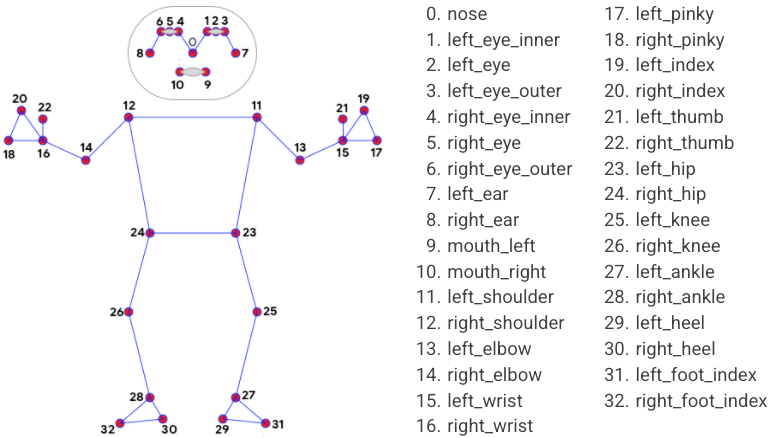

In [6]:
display.Image("./pose_tracking_full_body_landmarks.png")

In [7]:
# input the number and press enter
#body_indexes[] = input()
#print(pose_landmark[int(body_index)])

# taking multiple inputs at a time
# and type casting using list() function
x = list(map(int, input("Enter multiple indexes: ").split()))
print("List of body joints you want: ", x)
print('The lists are:', ' '.join([str(pose_landmark[int(body_index)]) for body_index in x]), sep=' ')

Enter multiple indexes: 7 8 9
List of body joints you want:  [7, 8, 9]
The lists are: LEFT_EAR RIGHT_EAR MOUTH_LEFT


In [8]:
size = len(x)
print(size)

3


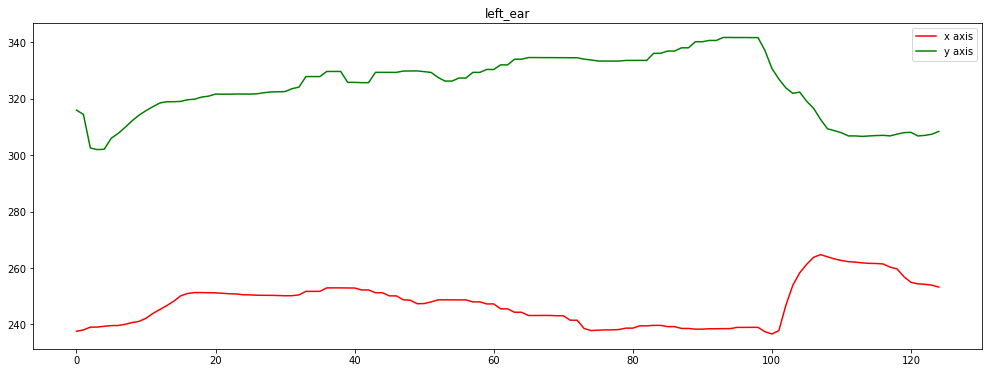

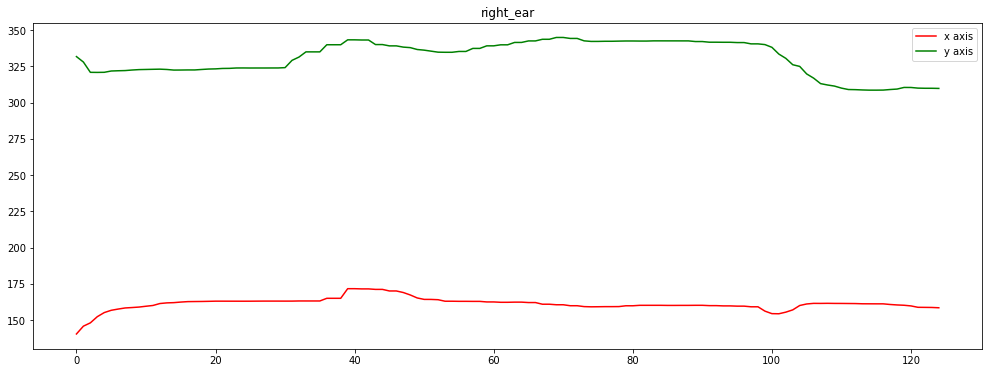

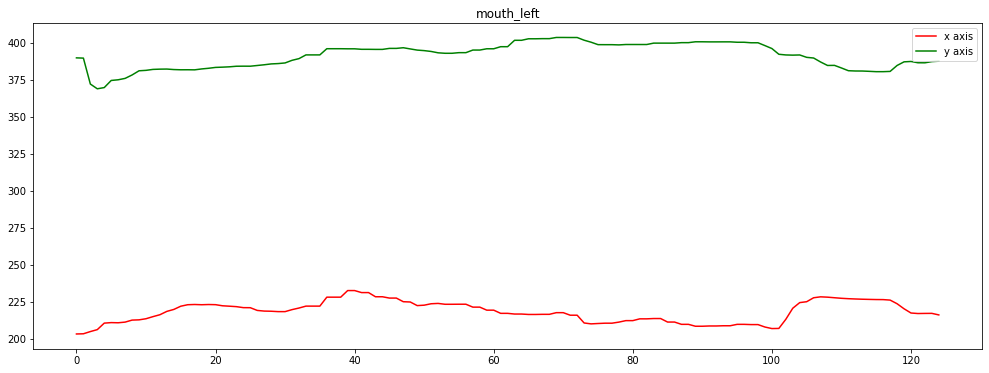

In [10]:
for body_index in x:
    # Parse the column from df
    body_col = df[pose_landmark[int(body_index)]].values
    # Convert string to array
    body_arr = [split_ele(x) for x in body_col]
    # Check the first one
    body_arr[0]
    # value x in the first element
    body_arr[0][0]

    # Get the x,y,z value array
    body_arr_x = []
    body_arr_y = []
    body_arr_z = []
    for i in range(len(body_arr)):
        body_arr_x = np.append(body_arr_x,body_arr[i][0])
        body_arr_y = np.append(body_arr_y,body_arr[i][1])
        body_arr_z = np.append(body_arr_y,body_arr[i][2])

    # Plot x and y axis
    plt.figure(figsize=(17, 6))
    plt.plot(body_arr_x, color='r', label='x axis')
    plt.plot(body_arr_y, color='g', label='y axis')
    plt.legend()
    plt.title((pose_landmark[int(body_index)]).lower())
    # Save the plotted graph
    save_fname = str(fname) +"_" + str((pose_landmark[int(body_index)]).lower()) + ".png"
    plt.savefig(save_fname)
    plt.show()